In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
pd.set_option('display.max_rows', 6)
%config InlineBackend.figure_format='retina'

In [2]:
# load runs
df = {}
df['SGD'] = utils.load_sweeps(['lm11m_sgd_grid_1'])
df['Adafactor'] = utils.load_sweeps(['lm11m_adafactor_grid_1'])
df['Adam'] = utils.load_sweeps(['lm11m_adam_1d_2'])
df['Muon'] = utils.load_sweeps(['lm11m_muon_grid_2'])

len(sweeps)=1
len(sweeps)=1
len(sweeps)=1
len(sweeps)=1


In [3]:
# get min loss for each batch size
def get_bs_min(df):
    min_idx = df.groupby('opt.batch_size')['eval_loss'].idxmin()
    return df.loc[min_idx]
min_loss = {k:get_bs_min(v) for k, v in df.items()}

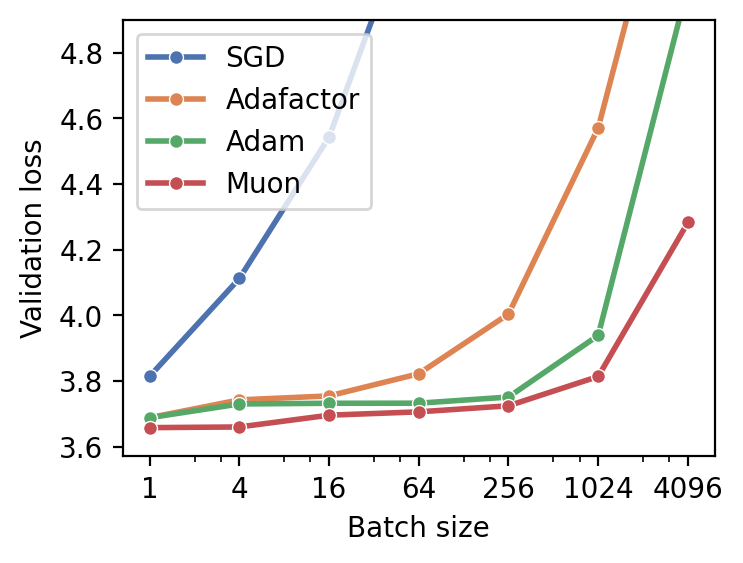

In [4]:
# plot min. loss for each BS
batch_sizes = np.sort(df['Adam']['opt.batch_size'].unique())
fig, ax = plt.subplots(figsize=(3.6, 2.7), layout='constrained')
# colors = ["#4C9AC9", "#FF7F4C", "#85B8A2", "#B85C5C"]
colors = np.array(sns.color_palette('deep'))#[[3, 2, 1, 0]]
for i, opt in enumerate(df.keys()):
    ax.plot(min_loss[opt]['opt.batch_size'], min_loss[opt]['eval_loss'], '.-', label=opt, color=colors[i], lw=2., mec='white', mew=0.5, ms=10)
ax.set_xscale('log')
ax.set_xticks(batch_sizes, batch_sizes)
ax.set_xticks([sub*4**i for i in range(6) for sub in [2, 3]], ['' for i in range(2*6)], minor=True)
ax.set_xlabel('Batch size')
ax.set_ylabel('Validation loss')
ax.set_ylim([3.57, 4.9])
ax.legend()
# plt.savefig('plots/optimizer_comp.pdf')
plt.show()